In [77]:
import ndradex
import numpy as np
import matplotlib.pyplot as pl
import os
pl.ion()

#Parametres de la grille
mol = '13co'
Qnul = ['1-0','2-1']
n_H2 = np.logspace(2,6,5)
n_e = 10
N_mol = np.logspace(14.5,17.5,10)
T_kin = np.linspace(10,100,10)
dv = np.linspace(0.5,3.5,4)
fn = "{}_{}.cdf".format(mol,Qnul)

In [78]:
if  os.path.exists(fn):
    ds = ndradex.load_dataset(fn)
else:
    #Calcul de la grille
    ds = ndradex.run(mol,Qnul,N_mol=N_mol,n_H2=n_H2,T_kin=T_kin,dv=dv,n_e=n_e)
    ds['I'].attrs['units'] = '$K km/s$'
    ds.coords['T_kin'].attrs['units'] = '$K$'
    ds.coords['N_mol'].attrs['units'] = '$cm^{-2}$'
    ds.coords['n_H2'].attrs['units'] = '$cm^{-3}$'
    ndradex.save_dataset(ds, fn)

100%|██████████| 4000/4000 [00:35<00:00, 112.69it/s]


In [79]:
# Quelques commandes utiles:
# Slicing: 
a = ds['I'].sel(n_H2=100)

# Interpolating: 
b = ds['I'].interp(n_H2=110)

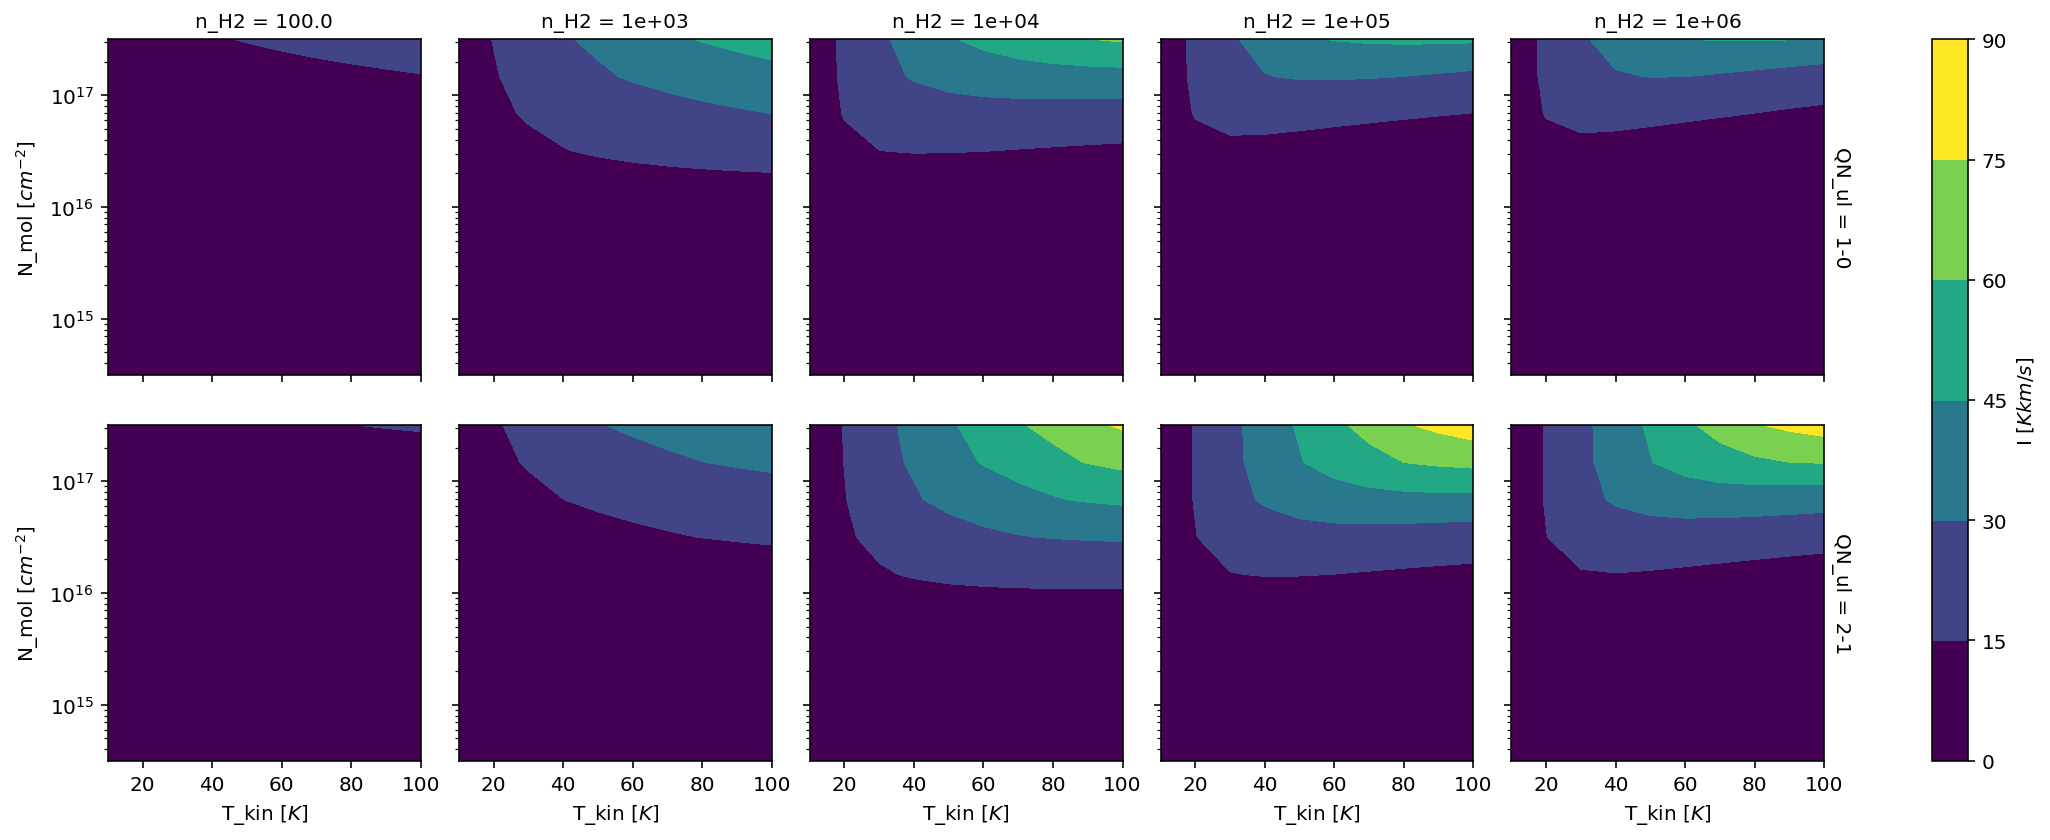

In [80]:
#Plotting
g = ds['I'].interp(dv=1).plot.contourf(y='N_mol',x='T_kin',col='n_H2',row='QN_ul')
pl.yscale('log')

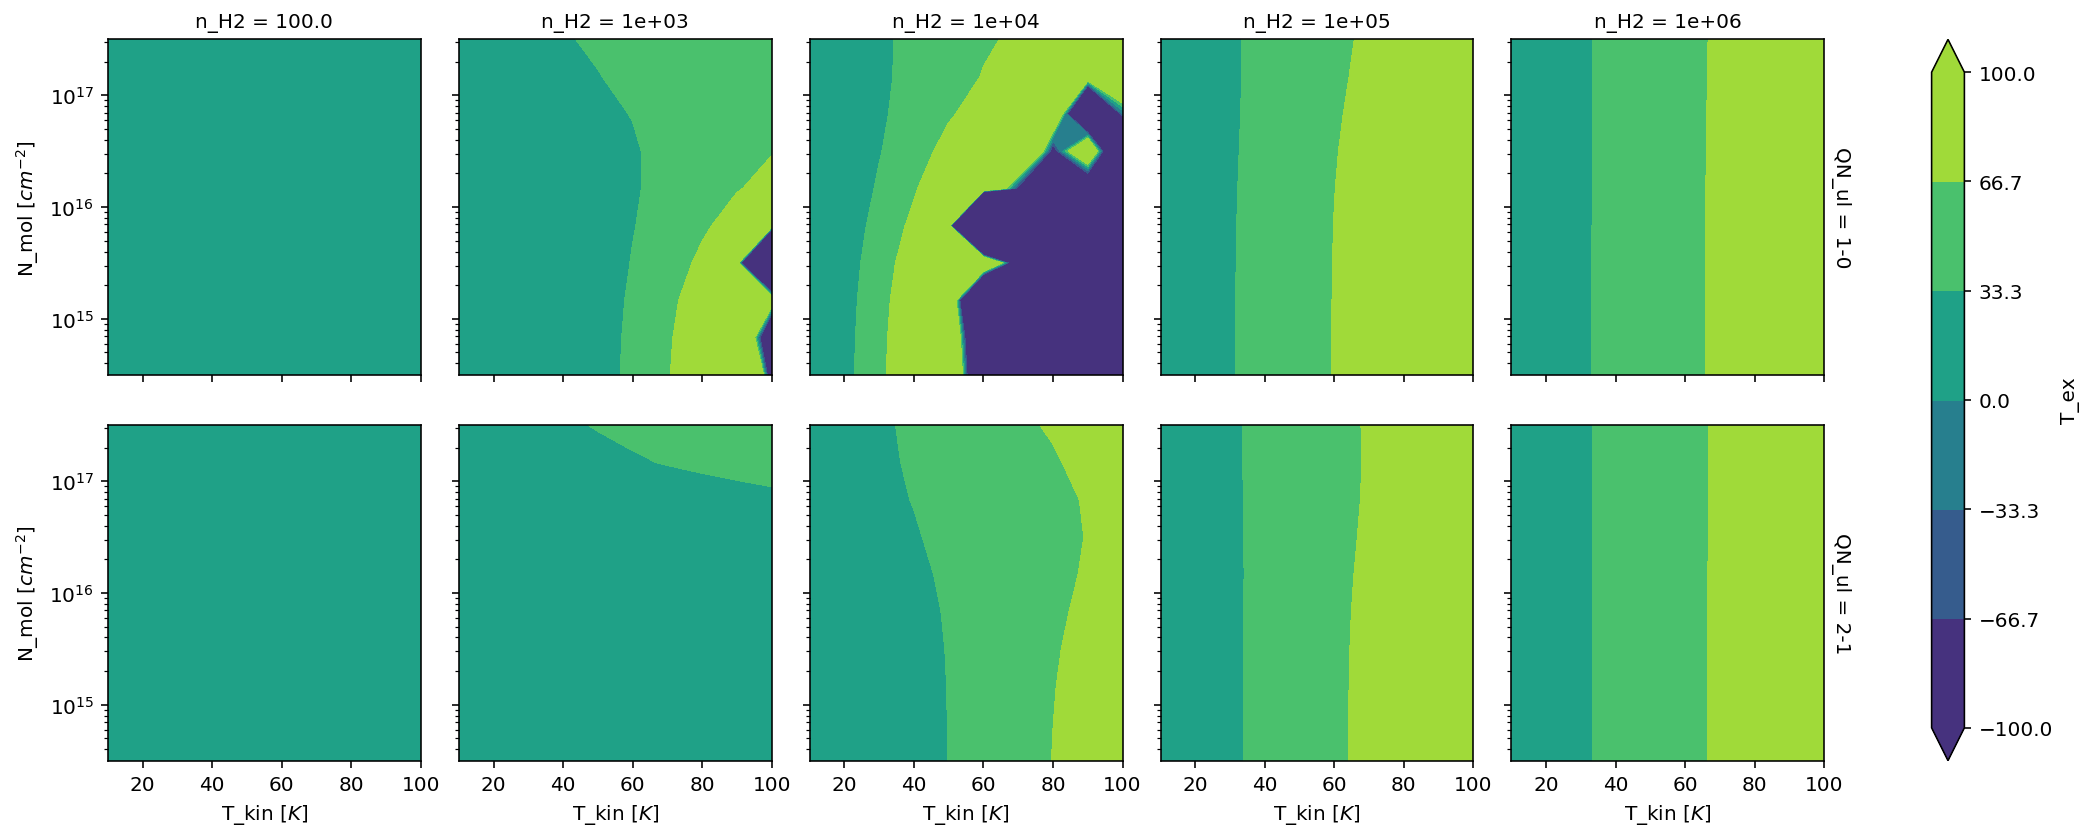

In [81]:
#Plotting
g = ds['T_ex'].interp(dv=1).plot.contourf(y='N_mol',x='T_kin',col='n_H2',row='QN_ul',vmin=-100,vmax=100)
pl.yscale('log')

In [82]:
#Comparing to observations
W10 = 12 #Kkm/s
W21 = 12 #Kkm/s

EQM10 = (ds['I'].sel(QN_ul='1-0')-W10)**2
EQM21 = (ds['I'].sel(QN_ul='2-1')-W21)**2
EQM = EQM10+EQM21
logEQM = np.log10(EQM)

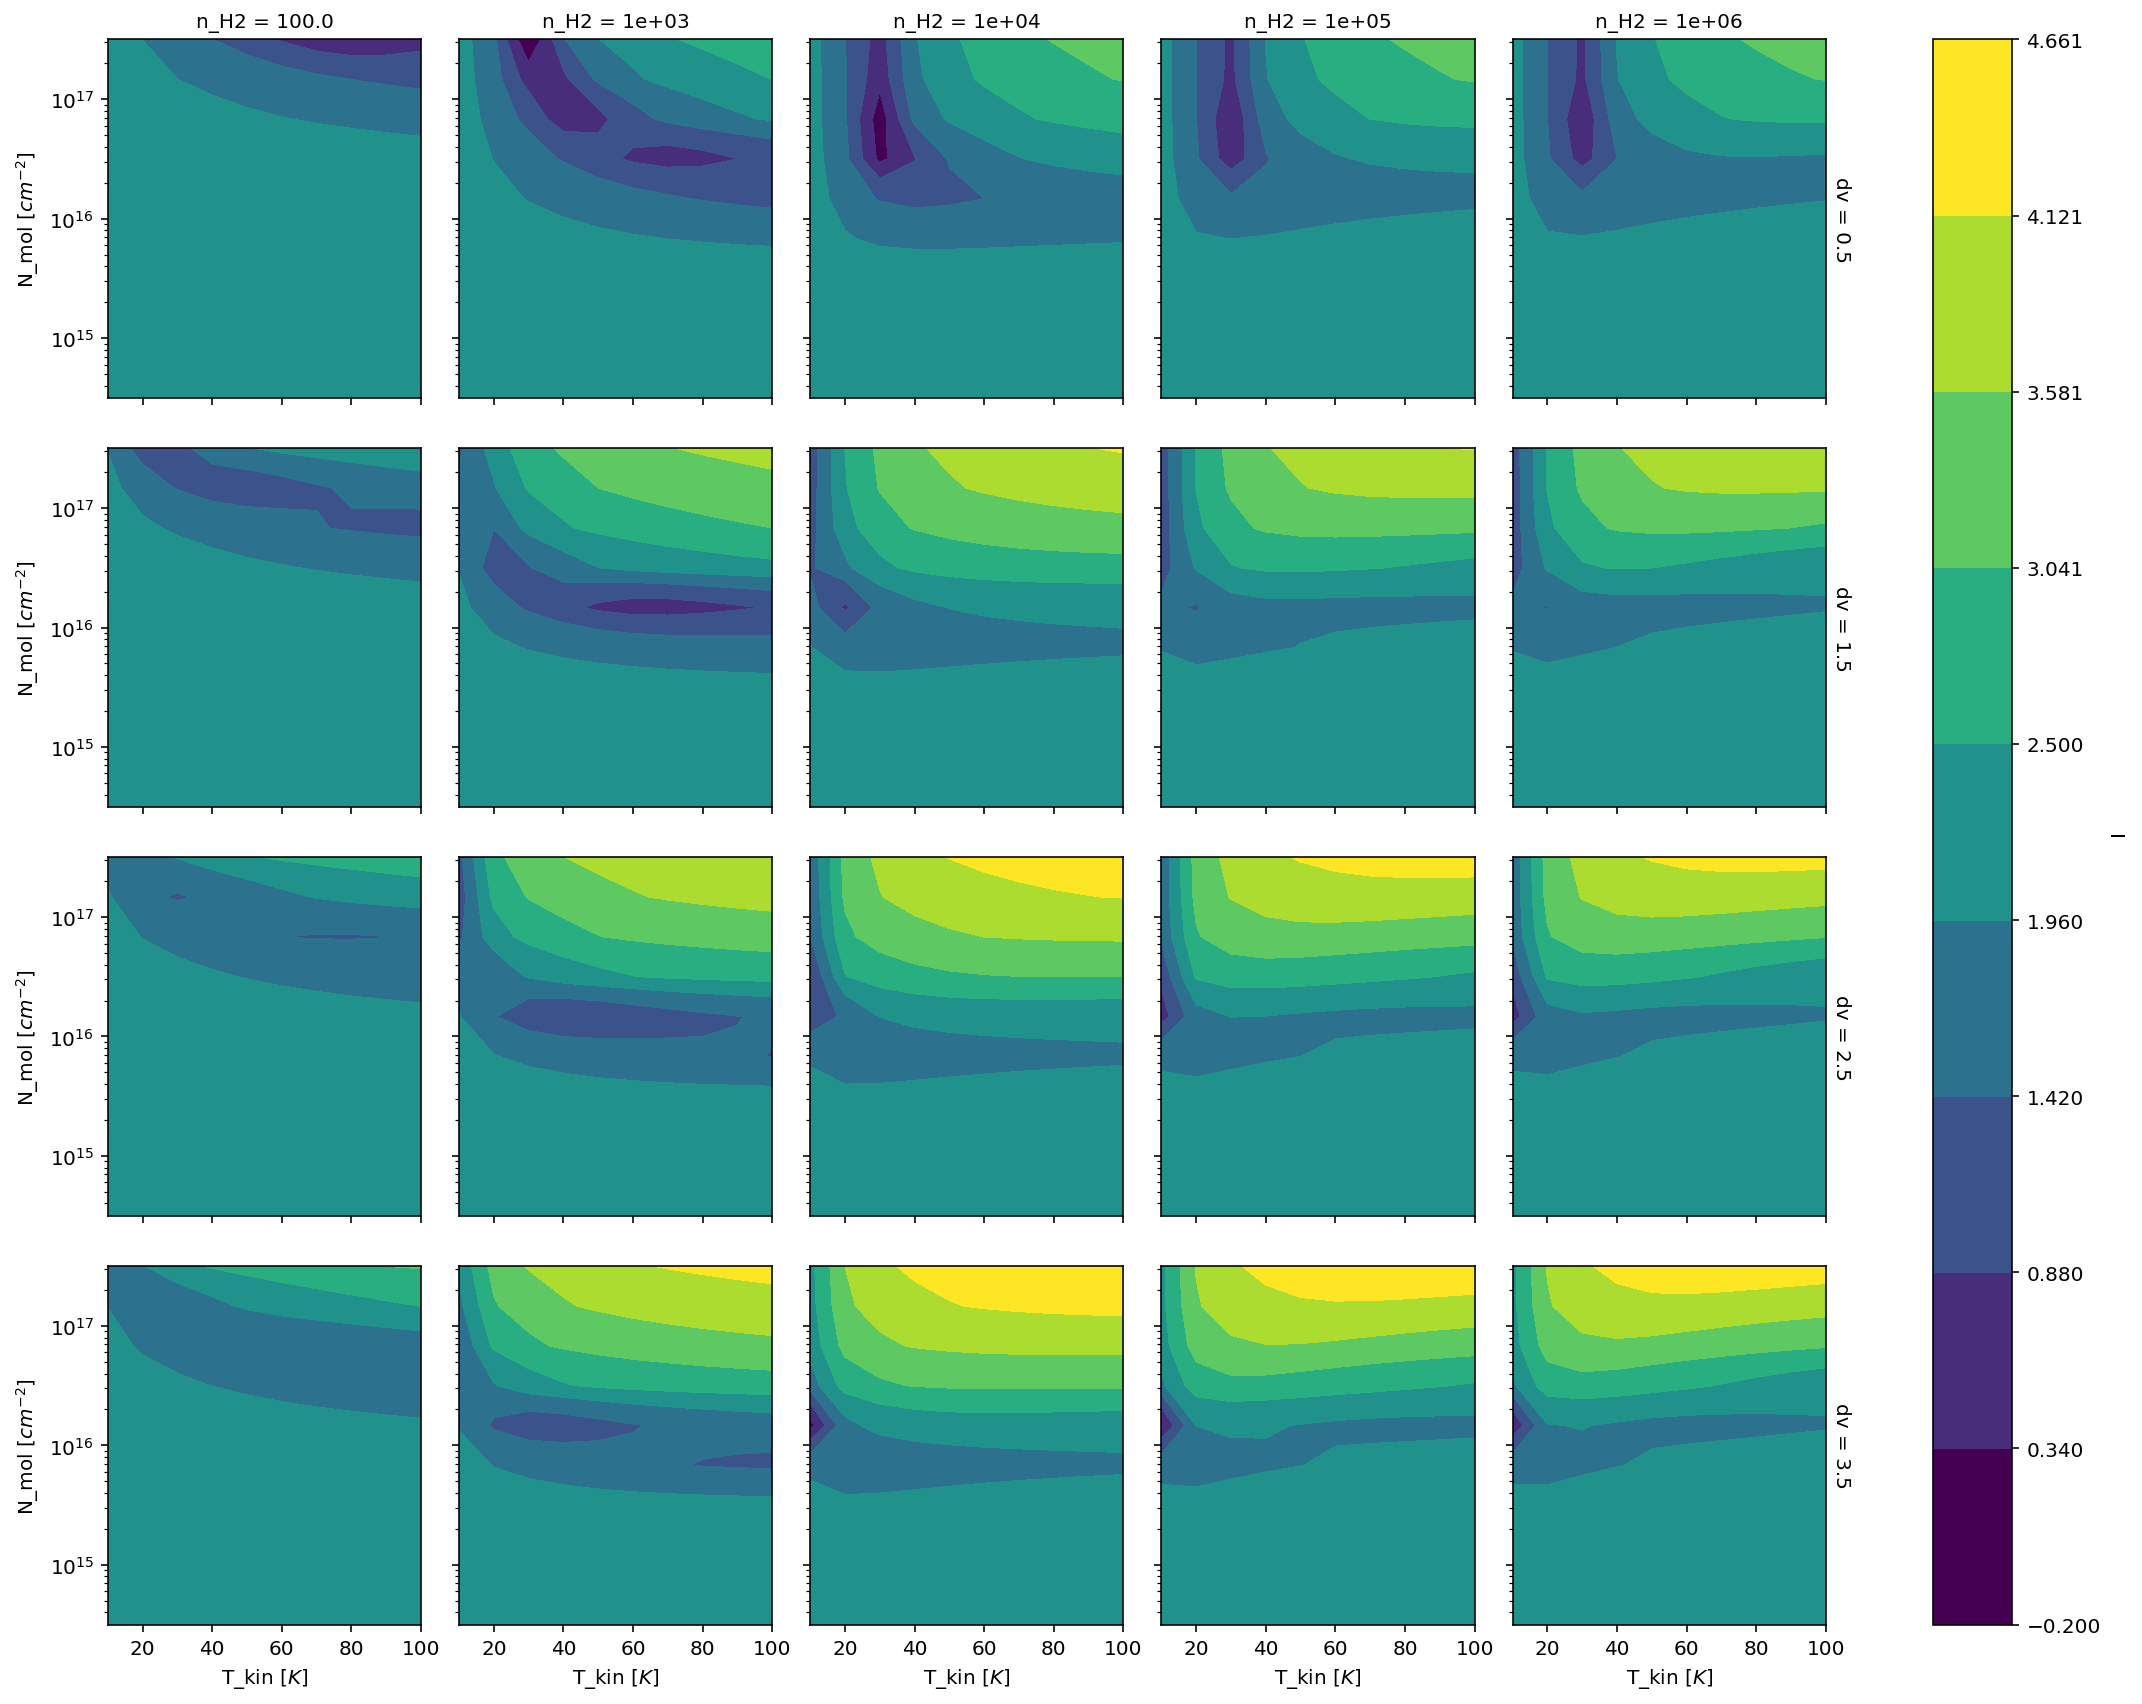

In [84]:
logEQM.plot.contourf(y='N_mol',x='T_kin',col='n_H2',row='dv',vmin=logEQM.min(),vmax=logEQM.max(),levels=10)
pl.yscale('log')